In [1]:
import os
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns

# Handling the missing values

In [2]:
df = pd.DataFrame({'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3],'D':['a',np.nan,'a']})
df['States']="CA NV AZ".split()
df.set_index('States',inplace=True)
print(df)

          A    B  C    D
States                  
CA      1.0  5.0  1    a
NV      2.0  NaN  2  NaN
AZ      NaN  NaN  3    a


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, CA to AZ
Data columns (total 4 columns):
A    2 non-null float64
B    1 non-null float64
C    3 non-null int64
D    2 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 120.0+ bytes


In [4]:
df.isnull().sum()

A    1
B    2
C    0
D    1
dtype: int64

In [5]:
print("\nDropping any rows with a NaN value\n",'-'*35, sep='')
print(df.dropna(axis=0))


Dropping any rows with a NaN value
-----------------------------------
          A    B  C  D
States                
CA      1.0  5.0  1  a


In [6]:
print("\nDropping any column with a NaN value\n",'-'*35, sep='')
print(df.dropna(axis=1))


Dropping any column with a NaN value
-----------------------------------
        C
States   
CA      1
NV      2
AZ      3


In [7]:
print("\nFilling values with a default value\n",'-'*35, sep='')
print(df.fillna(value='FILL VALUE'))


Filling values with a default value
-----------------------------------
                 A           B  C           D
States                                       
CA               1           5  1           a
NV               2  FILL VALUE  2  FILL VALUE
AZ      FILL VALUE  FILL VALUE  3           a


In [8]:
print("\nFilling values with a computed value (mean of column A here)\n",'-'*60, sep='')
print(df.fillna(value=df['A'].mean()))


Filling values with a computed value (mean of column A here)
------------------------------------------------------------
          A    B  C    D
States                  
CA      1.0  5.0  1    a
NV      2.0  1.5  2  1.5
AZ      1.5  1.5  3    a


In [9]:
#in case of continous variable
print("\nFilling values with a computed value (mean of column B here) in a particular \n",'-'*60, sep='')
print(df['B'].fillna(df['B'].mean()))


Filling values with a computed value (mean of column B here) in a particular 
------------------------------------------------------------
States
CA    5.0
NV    5.0
AZ    5.0
Name: B, dtype: float64


In [10]:
#in case of catagorical variable
print("\nFilling values with a computed value (mode of column D here) in a particular column\n",'-'*60, sep='')
print(df['D'].fillna(df['D'].mode()[0]))


Filling values with a computed value (mode of column D here) in a particular column
------------------------------------------------------------
States
CA    a
NV    a
AZ    a
Name: D, dtype: object


# Converting data from 'long' to 'wide' format using `.pivot()`

Usually, for convenience, data in relational DB is stored in the **long format**
* fewer columns, label duplication in keys

For certain kinds of analysis, we might prefer to have the data in the **wide format**
* more columns, unique labels in keys

The `df.pivot()` method takes the names of columns to be used as row (`index=`) and column indexes (`columns=`) and a column to fill in the data as (`values=`)


In [11]:
df = DataFrame({'date': (list(pd.date_range('2000-01-03', '2000-01-05')) * 4),
          'item': (list('ABCD'*3)),
          'status': (np.random.randn(12))})
df

,date,item,status
0,2000-01-03,A,-0.323524
1,2000-01-04,B,-0.683842
2,2000-01-05,C,0.888075
3,2000-01-03,D,-1.353790
4,2000-01-04,A,-1.763947
5,2000-01-05,B,0.329982
6,2000-01-03,C,-1.097838
7,2000-01-04,D,-0.414179
8,2000-01-05,A,2.070706
9,2000-01-03,B,0.383592


In [12]:
#df.set_index(['date', 'item']).unstack()

In [13]:
df.pivot(index='date', columns='item', values='status')

item,A,B,C,D
date,,,,
2000-01-03,-0.323524,0.383592,-1.097838,-1.353790
2000-01-04,-1.763947,-0.683842,-0.052887,-0.414179
2000-01-05,2.070706,0.329982,0.888075,0.034612


In [14]:
df_p = pd.concat([df, df.assign(status = lambda x: x['status'] * 2)])
df_p

,date,item,status
0,2000-01-03,A,-0.323524
1,2000-01-04,B,-0.683842
2,2000-01-05,C,0.888075
3,2000-01-03,D,-1.353790
4,2000-01-04,A,-1.763947
5,2000-01-05,B,0.329982
6,2000-01-03,C,-1.097838
7,2000-01-04,D,-0.414179
8,2000-01-05,A,2.070706
9,2000-01-03,B,0.383592


In [15]:
pd.pivot_table(data=df_p, 
               index='date', 
               columns='item', 
               values='status', 
               aggfunc=np.sum)

item,A,B,C,D
date,,,,
2000-01-03,-0.970573,1.150776,-3.293515,-4.061371
2000-01-04,-5.291841,-2.051525,-0.158661,-1.242537
2000-01-05,6.212118,0.989947,2.664224,0.103835


-----------------------------------------------------------------------------------------------------------------------------

# $Transforming$ Data

## A. Removing Duplicates

* `df.duplicated()` Returns boolean Series denoting duplicate rows, optionally only considering certain columns
* `df.drop_duplicates()` Returns DataFrame with duplicate rows removed, optionally only considering certain columns


In [16]:
df = DataFrame({'C1': list('ABC' * 2),
          'C2': [1, 2, 4, 3, 2, 4]})
df

,C1,C2
0,A,1
1,B,2
2,C,4
3,A,3
4,B,2
5,C,4


In [17]:
#to find which row has duplicate values
df.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [18]:
df.assign(Dups = df.duplicated())
# Creates a boolean series to indicate which rows have dups

,C1,C2,Dups
0,A,1,False
1,B,2,False
2,C,4,False
3,A,3,False
4,B,2,True
5,C,4,True


In [19]:
df[df.duplicated()]
# Retain the rows that are duplicates

,C1,C2
4,B,2
5,C,4


In [20]:
df[-df.duplicated()]

,C1,C2
0,A,1
1,B,2
2,C,4
3,A,3


In [21]:
df.drop_duplicates()
# retain the first occurrence of each row (drop dups)

,C1,C2
0,A,1
1,B,2
2,C,4
3,A,3


In [22]:
df.drop_duplicates(keep='last')
# retain the last occurrence of each row (drop dups)

,C1,C2
0,A,1
3,A,3
4,B,2
5,C,4


In [23]:
df.drop_duplicates(keep=False)

,C1,C2
0,A,1
3,A,3


### To find number of duplicated rows

In [24]:
df.duplicated().value_counts()

False    4
True     2
dtype: int64

> By default, these methods consider all of the columns. To specify a subset for detecting duplicates, use **`df.drop_duplicates(['list-of-columns'])`**

-----------------------------------------------------------------------------------------------------------------------------

In [25]:
pd.cut?

## B. Binning Numeric Variables to Categoricals

The `pd.cut()` and `pd.qcut()` functions are used; they take as arguments the following;

* `var`, the continuous variable to discretize
* `bins`, specified as a number (equal sized bins will be computed based on min/max) or a list of bin edges
* `right=True`, a boolean to include the edge or not
* `labels=`, for naming the bins
* `precision=`



In [26]:
# Create a list of 20 integers between 1 and 100
var = np.random.randint(1, 100, 500)
var[:10]

array([21, 54, 65, 78, 71, 31, 30, 14, 89,  3])

In [27]:
# Automatic Binning
pd.cut(var, 5)

[(20.6, 40.2], (40.2, 59.8], (59.8, 79.4], (59.8, 79.4], (59.8, 79.4], ..., (59.8, 79.4], (20.6, 40.2], (0.902, 20.6], (40.2, 59.8], (20.6, 40.2]]
Length: 500
Categories (5, interval[float64]): [(0.902, 20.6] < (20.6, 40.2] < (40.2, 59.8] < (59.8, 79.4] < (79.4, 99.0]]

In [28]:
# Specifying bins manually
pd.cut(var, bins=range(0, 100, 20))

[(20, 40], (40, 60], (60, 80], (60, 80], (60, 80], ..., (60, 80], (20, 40], (0, 20], (40, 60], (20, 40]]
Length: 500
Categories (4, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80]]

In [29]:
pd.cut(var, 3, labels=['young', '34to66', '67to99'])[:10]

[young, 34to66, 34to66, 67to99, 67to99, young, young, young, 67to99, young]
Categories (3, object): [young < 34to66 < 67to99]

In [30]:
pd.concat([Series(var[:10], name='Values'), 
           Series(pd.cut(var, 3, labels=['A', 'B', 'C'])[:10], name='Bins')], axis=1)

,Values,Bins
0,21,A
1,54,B
2,65,B
3,78,C
4,71,C
5,31,A
6,30,A
7,14,A
8,89,C
9,3,A


In [31]:
pd.cut(var, 3, labels=['one', 'two', 'three'], retbins=True)

([one, two, two, three, three, ..., three, one, one, two, two]
 Length: 500
 Categories (3, object): [one < two < three],
 array([ 0.902     , 33.66666667, 66.33333333, 99.        ]))

In [32]:
pd.cut(var, [0, 25, 50, 75, 100]).value_counts()

(0, 25]      125
(25, 50]     128
(50, 75]     125
(75, 100]    122
dtype: int64

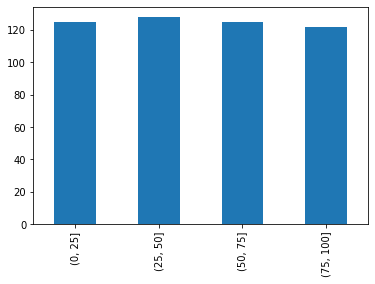

In [33]:
pd.cut(var, [0, 25, 50, 75, 100]).value_counts().plot(kind='bar')

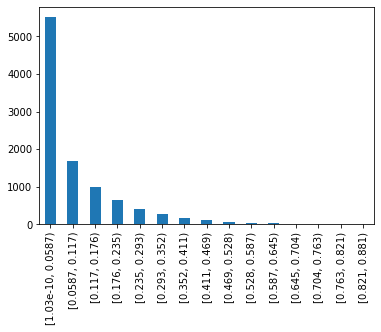

In [34]:
pd.cut(np.random.beta(0.5, 5, 10000), 15, right=False).value_counts().plot(kind='bar')

-----------------------------------------------------------------------------------------------------------------------------

## C. Create Dummies for a Categorical Variable
Create a (n x k) matrix of binary variables from a categorical variable of length n with k levels.

`pd.get_dummies(var)` does this.

In [35]:
df_G = DataFrame({'key': list('bbacccb'),
                 'val': np.random.randn(7) })
df_G

,key,val
0,b,-0.571986
1,b,1.875871
2,a,0.360689
3,c,-1.023544
4,c,1.036020
5,c,-0.390548
6,b,-1.275728


In [36]:
pd.get_dummies(df_G['key'], prefix='bool').astype(int)

,bool_a,bool_b,bool_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0


In [37]:
DataFrame({'key': df_G['key']}).assign(dummy_a = lambda x: [i=='a' for i in x['key']],
                                      dummy_b = lambda x: [i=='b' for i in x['key']],
                                      dummy_c = lambda x: [i=='c' for i in x['key']])

,key,dummy_a,dummy_b,dummy_c
0,b,False,True,False
1,b,False,True,False
2,a,True,False,False
3,c,False,False,True
4,c,False,False,True
5,c,False,False,True
6,b,False,True,False


In [38]:
# Create and merge dummies in the same DF
df_G.join(pd.get_dummies(df_G['key'], prefix='dummy'))

,key,val,dummy_a,dummy_b,dummy_c
0,b,-0.571986,0,1,0
1,b,1.875871,0,1,0
2,a,0.360689,1,0,0
3,c,-1.023544,0,0,1
4,c,1.036020,0,0,1
5,c,-0.390548,0,0,1
6,b,-1.275728,0,1,0


In [39]:
# Create a categorical variable from a numeric and then compute dummies
df_G.val = np.random.rand(7)
df_G

,key,val
0,b,0.968231
1,b,0.936310
2,a,0.382727
3,c,0.452069
4,c,0.539270
5,c,0.103146
6,b,0.372030


In [40]:
pd.get_dummies(pd.cut(df_G['val'], 3, labels=list('XYZ')), prefix='dummy')

,dummy_X,dummy_Y,dummy_Z
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0


---
## Task

- Create a dataframe with 2 variables called 'Age' and 'Income'. 
- Fill these with random integers between (1, 100) and (10k to 100k) for 'Income'.  Use 10k rows.
- Use cut to bin Age into 5 bins.
- Use qcut to bin Income in to 10 bins. 
- Assign meaningful labels to each.
- Convert both these cut variables into Dummies.
- Report the mean and sum of each dummy variable.

---

-----------------------------------------------------------------------------------------------------------------------------

## String Methods

These include methods applied to string objects that 
* split a string by given delimiter - `.split()`
* trim whitespace - `.strip()`
* concatenate strings - `.join()`
* detect substrings - `.find()` and `.index()`
* count occurrences - `.count()`
* find and replace - `.replace()`


In [41]:
s = 'ready, set ,   go '
s

'ready, set ,   go '

In [42]:
# String Splitting
' '.join([x.strip() for x in s.split(',')])

'ready set go'

In [43]:
# Trimming whitespace
pieces = [x.strip() for x in s.split(',')]
pieces
# Also see rstrip, lstrip

['ready', 'set', 'go']

In [44]:
'_#_'.join(list('abcde'))

'a_#_b_#_c_#_d_#_e'

-----------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------

# _Group by_

In Data Analysis workflows, operations like `loading, cleaning and merging` are usually following by `summarizations` using some grouping variable(s). This includes _summary statistics_ over variables or groups within variables, within-group _transformations_ (like variable standardization), computing _pivot-tables_ and group analyses.

    


In [46]:
df = DataFrame({'k1': list('abcd' * 25),
               'k2': list('xy' * 25 + 'yx' * 25),
               'v1': np.random.rand(100),
               'v2': np.random.rand(100)}); df[:15]

,k1,k2,v1,v2
0,a,x,0.882804,0.992560
1,b,y,0.295695,0.392222
2,c,x,0.585955,0.608596
3,d,y,0.099377,0.997175
4,a,x,0.039857,0.558484
5,b,y,0.931784,0.227972
6,c,x,0.012879,0.095420
7,d,y,0.187064,0.141321
8,a,x,0.017882,0.124684
9,b,y,0.322410,0.546735


#### Syntax

`df.groupby('[<col-name(s)>]').apply(<udfs>) or <existing-function>`

### Grouping by one key 

**Results in a summarized data frame indexed by levels of the key**

In [47]:
df.groupby('k1').mean()

,v1,v2
k1,,
a,0.482004,0.566793
b,0.558301,0.487438
c,0.491636,0.535648
d,0.517528,0.533555


In [48]:
df.groupby('k2').sum()

,v1,v2
k2,,
x,24.182400,27.006368
y,27.054326,26.079503


### Grouping by two keys

**Results in a summarized data frame with a hierarchical index**

In [49]:
df.groupby(['k1', 'k2']).sum()

v1        v2
k1 k2                    
a  x   5.735736  6.909839
   y   6.314367  7.259988
b  x   5.674038  7.096754
   y   8.283484  5.089194
c  x   5.594520  5.523622
   y   6.696382  7.867588
d  x   7.178105  7.476153
   y   5.760093  5.862734

### Groupby objects Methods

---
### Task 1: 

1. Create a 100x4 DataFrame filled with random numbers (from a normal distribution.)
Ensure that there's 2 categorical columns with 5 and 3 categories each.

2. Create the groupby object using both keys and find the mean, max, median for each group.

---

### Column-wise aggregations and UDFs

**For simple aggregations (Series or all numeric columns of a DataFrame) we can call methods like `mean` and `sum`**

In [50]:
# Summing a Series
# Syntax: Select a Series - GroupBy - Apply function
df['v1'].groupby(df['k1']).sum()

k1
a    12.050103
b    13.957522
c    12.290902
d    12.938198
Name: v1, dtype: float64

In [51]:
# Summing all Series of a DataFrame
# Syntax: Select DF - Groupby - Apply
df.groupby('k2').mean()

,v1,v2
k2,,
x,0.483648,0.540127
y,0.541087,0.521590


**or you can pass the name of a function as a string with the `.agg()` method**

In [52]:
df['v1'].groupby(df['k1']).agg('sum')

k1
a    12.050103
b    13.957522
c    12.290902
d    12.938198
Name: v1, dtype: float64

In [53]:
df.groupby(df.k1).agg('mean').add_prefix('mu_')

,mu_v1,mu_v2
k1,,
a,0.482004,0.566793
b,0.558301,0.487438
c,0.491636,0.535648
d,0.517528,0.533555


In [54]:
pd.concat([df.groupby(df.k1).agg('mean').add_prefix('mu_'),
           df.groupby(df.k1).agg('std').add_prefix('sigma_')], axis=1)

,mu_v1,mu_v2,sigma_v1,sigma_v2
k1,,,,
a,0.482004,0.566793,0.314001,0.321342
b,0.558301,0.487438,0.313589,0.253252
c,0.491636,0.535648,0.260569,0.297060
d,0.517528,0.533555,0.250097,0.319592


---
### The `.agg()` method

takes as argument the following:
* list of function names to be applied to all selected columns
* tuples of (colname, function) to be applied to all selected columns
* dict of (df.col, function) to be applied to each df.col

**1. Apply >1 functions to selected column(s) by passing names of functions to `agg()`**

In [55]:
# Apply min, mean, max and max to v1 grouped by k1
df.groupby('k1').agg(['sum', 'mean', 'max'])

v1                             v2                    
          sum      mean       max        sum      mean       max
k1                                                              
a   12.050103  0.482004  0.963949  14.169827  0.566793  0.992560
b   13.957522  0.558301  0.997683  12.185947  0.487438  0.984904
c   12.290902  0.491636  0.906901  13.391210  0.535648  0.999998
d   12.938198  0.517528  0.961399  13.338887  0.533555  0.997175

In [56]:
# Apply min and max to all numeric columns of df grouped by k2
df.groupby('k1')[['v1']].agg(['min', 'max'])

v1          
         min       max
k1                    
a   0.017882  0.963949
b   0.032424  0.997683
c   0.012879  0.906901
d   0.031368  0.961399

### 2. We can supply names for the columns in the aggregated df

to the agg() method, in a list of tuples as `[(colname1, func1), (colname2, func2) ...] `

In [57]:
df.groupby('k1')[['v1', 'v2']].agg([('tot_sales', 'sum'), ('largest', 'max')])

v1                   v2          
    tot_sales   largest  tot_sales   largest
k1                                          
a   12.050103  0.963949  14.169827  0.992560
b   13.957522  0.997683  12.185947  0.984904
c   12.290902  0.906901  13.391210  0.999998
d   12.938198  0.961399  13.338887  0.997175

### 3. We can supply df columns and which funcs to apply to each

to the agg() method in a dictionary

In [58]:
# Apply max and min to v1; and mean and sum to v2; all grouped by k1
df[['v1', 'v2']].groupby(df['k1']).agg({'v1': ['max', 'min'], 'v2': ['mean', 'sum']})

v1                  v2           
         max       min      mean        sum
k1                                         
a   0.963949  0.017882  0.566793  14.169827
b   0.997683  0.032424  0.487438  12.185947
c   0.906901  0.012879  0.535648  13.391210
d   0.961399  0.031368  0.533555  13.338887